In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
# import osimport graphviz
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:
df=pd.read_csv('loanpredictiontrain.csv')
df1=pd.read_csv('loanpredictiontest.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df=df.drop(['Loan_ID'], axis=1)

In [4]:
def summary(df):
    sum_df = pd.DataFrame(df.dtypes, columns=["dtypes"])
    sum_df["missing"] = df.isna().sum()
    sum_df["missing %"] = (df.isna().sum())/ len(df)
    sum_df["uniques"] = df.nunique().values
    sum_df["count"] = df.count().values
    return sum_df.sort_values("missing %", ascending=False)
summary(df)

,dtypes,missing,missing %,uniques,count
Credit_History,float64,50,0.081433,2,564
Self_Employed,object,32,0.052117,2,582
LoanAmount,float64,22,0.035831,203,592
Dependents,object,15,0.024430,4,599
Loan_Amount_Term,float64,14,0.022801,10,600
Gender,object,13,0.021173,2,601
Married,object,3,0.004886,2,611
Education,object,0,0.000000,2,614
ApplicantIncome,int64,0,0.000000,505,614
CoapplicantIncome,float64,0,0.000000,287,614


In [5]:
df.shape

(614, 12)

In [6]:
df1.shape

(367, 12)

In [7]:
summary(df1)

,dtypes,missing,missing %,uniques,count
Credit_History,float64,29,0.079019,2,338
Self_Employed,object,23,0.062670,2,344
Gender,object,11,0.029973,2,356
Dependents,object,10,0.027248,4,357
Loan_Amount_Term,float64,6,0.016349,12,361
LoanAmount,float64,5,0.013624,144,362
Loan_ID,object,0,0.000000,367,367
Married,object,0,0.000000,2,367
Education,object,0,0.000000,2,367
ApplicantIncome,int64,0,0.000000,314,367


In [8]:
# df.dropna(inplace=True)

In [9]:
# def fillna_values(df):
#     sum_df = pd.DataFrame(df.dtypes, columns=["dtypes"])
#     sum_df["missing"] = df.isna().sum()
#     sum_df["missing %"] = (df.isna().sum())/ len(df)
#     sum_df["uniques"] = df.nunique().values
#     sum_df["count"] = df.count().values
#     return sum_df.sort_values("missing %", ascending=False)
# fillna_values(df)


# df['fuel_type']=df['fuel_type'].fillna(df['fuel_type'].mode())

In [10]:
co=df.isna().sum()
null_cols = []
for col, value in co.items():
    if value>0:
        null_cols.append(col)
null_cols


['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
df['Gender'].mode()[0]

'Male'

In [12]:
df2=df.copy()
def fillna_values(df):
    for cols in null_cols:
            df[cols]=df[cols].fillna(df[cols].dropna().mode()[0])
    return df    

df3=fillna_values(df2)


In [13]:
summary(df3)

,dtypes,missing,missing %,uniques,count
Gender,object,0,0.0,2,614
Married,object,0,0.0,2,614
Dependents,object,0,0.0,4,614
Education,object,0,0.0,2,614
Self_Employed,object,0,0.0,2,614
ApplicantIncome,int64,0,0.0,505,614
CoapplicantIncome,float64,0,0.0,287,614
LoanAmount,float64,0,0.0,203,614
Loan_Amount_Term,float64,0,0.0,10,614
Credit_History,float64,0,0.0,2,614


In [14]:
df3['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [15]:
# Empty list to store columns with categorical data
categorical = []
for col, value in df3.items():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = df3.columns.difference(categorical)

In [16]:
# df3[numerical].corr()


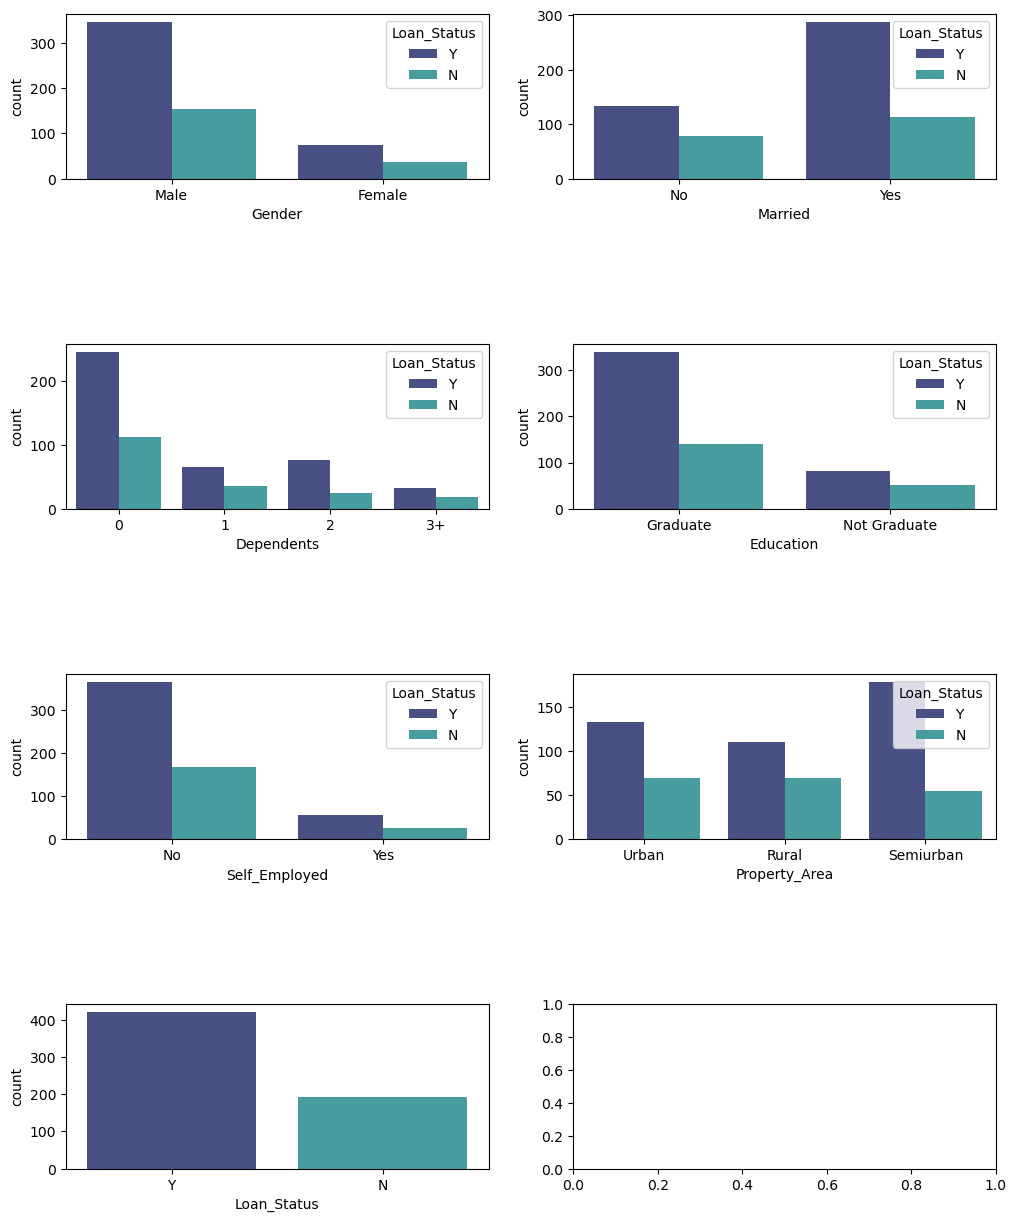

In [43]:
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat in enumerate(categorical):
    row,col=idx//2,idx%2
    sns.countplot(x=cat,data=df3,hue='Loan_Status', ax=axes[row,col],palette='mako')

plt.subplots_adjust(hspace=1)

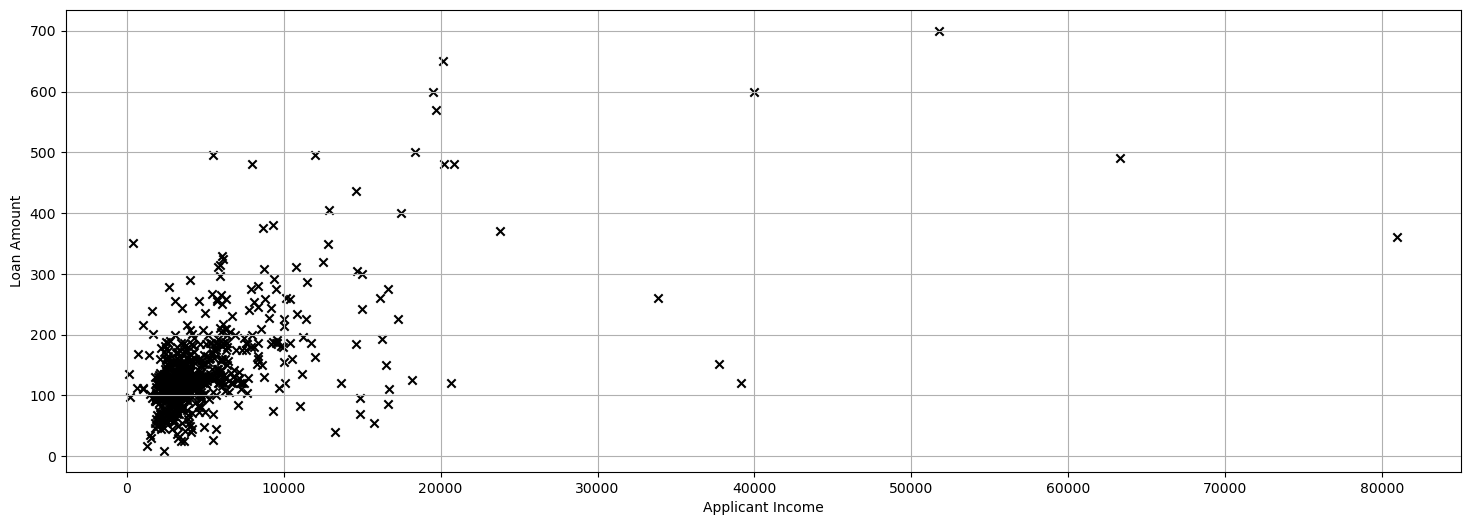

In [46]:
#scatterplot
plt.figure(figsize=(18,6))
plt.grid()
plt.scatter(df3['ApplicantIncome'],df3['LoanAmount'],c='k',marker='x')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

C:\Users\varkumar\AppData\Local\Temp\ipykernel_12692\1988464579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

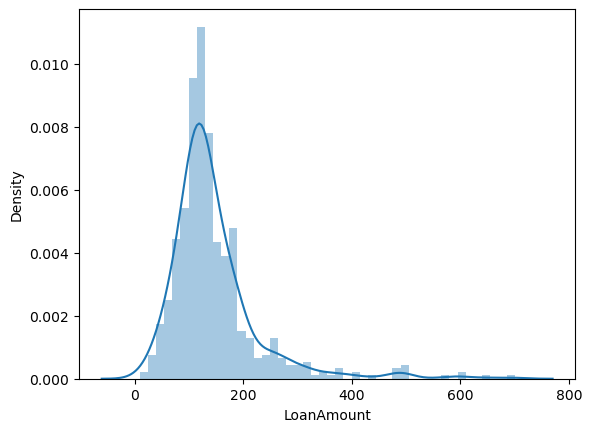

In [56]:
sns.distplot(df3['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

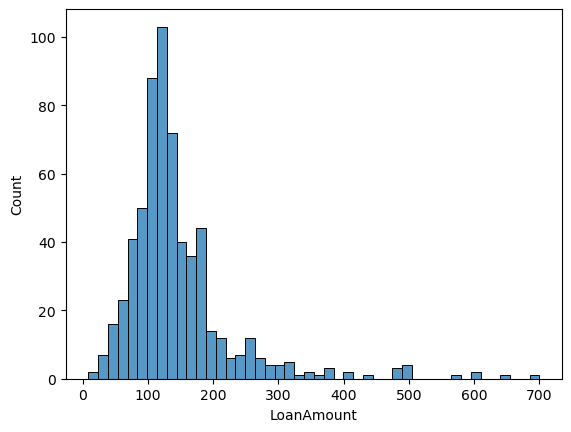

In [58]:
sns.histplot(df3['LoanAmount'])

C:\Users\varkumar\AppData\Local\Temp\ipykernel_12692\3141744912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

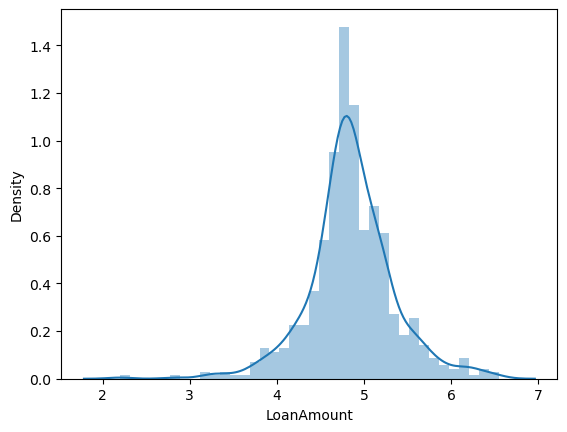

In [60]:
df3['LoanAmount']=np.log(df3['LoanAmount'])
sns.distplot(df3['LoanAmount'])

In [62]:
df3['Loan_Status'].replace({'N':0,'Y':1},inplace=True)
df3['Gender'].replace({'Male':0,'Female':1},inplace=True)
df3['Married'].replace({'No':0,'Yes':1},inplace=True)
df3['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)
df3.head(10)

C:\Users\varkumar\AppData\Local\Temp\ipykernel_12692\1143636177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Loan_Status'].replace({'N':0,'Y':1},inplace=True)
C:\Users\varkumar\AppData\Local\Temp\ipykernel_12692\1143636177.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Loan_Sta

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,Graduate,0,5849,0.0,4.787492,360.0,1.0,Urban,1
1,0,1,1,Graduate,0,4583,1508.0,4.852030,360.0,1.0,Rural,0
2,0,1,0,Graduate,1,3000,0.0,4.189655,360.0,1.0,Urban,1
3,0,1,0,Not Graduate,0,2583,2358.0,4.787492,360.0,1.0,Urban,1
4,0,0,0,Graduate,0,6000,0.0,4.948760,360.0,1.0,Urban,1
5,0,1,2,Graduate,1,5417,4196.0,5.587249,360.0,1.0,Urban,1
6,0,1,0,Not Graduate,0,2333,1516.0,4.553877,360.0,1.0,Urban,1
7,0,1,3+,Graduate,0,3036,2504.0,5.062595,360.0,0.0,Semiurban,0
8,0,1,2,Graduate,0,4006,1526.0,5.123964,360.0,1.0,Urban,1
9,0,1,1,Graduate,0,12841,10968.0,5.855072,360.0,1.0,Semiurban,0


In [64]:
summary(df3)

,dtypes,missing,missing %,uniques,count
Gender,int64,0,0.0,2,614
Married,int64,0,0.0,2,614
Dependents,object,0,0.0,4,614
Education,object,0,0.0,2,614
Self_Employed,int64,0,0.0,2,614
ApplicantIncome,int64,0,0.0,505,614
CoapplicantIncome,float64,0,0.0,287,614
LoanAmount,float64,0,0.0,203,614
Loan_Amount_Term,float64,0,0.0,10,614
Credit_History,float64,0,0.0,2,614


In [68]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in ['Property_Area','Education','Dependents']:
    df3[column] = labelencoder.fit_transform(df3[column])

df3.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,4.787492,360.0,1.0,2,1
1,0,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,0,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1
3,0,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1
4,0,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1
5,0,1,2,0,1,5417,4196.0,5.587249,360.0,1.0,2,1
6,0,1,0,1,0,2333,1516.0,4.553877,360.0,1.0,2,1
7,0,1,3,0,0,3036,2504.0,5.062595,360.0,0.0,1,0
8,0,1,2,0,0,4006,1526.0,5.123964,360.0,1.0,2,1
9,0,1,1,0,0,12841,10968.0,5.855072,360.0,1.0,1,0


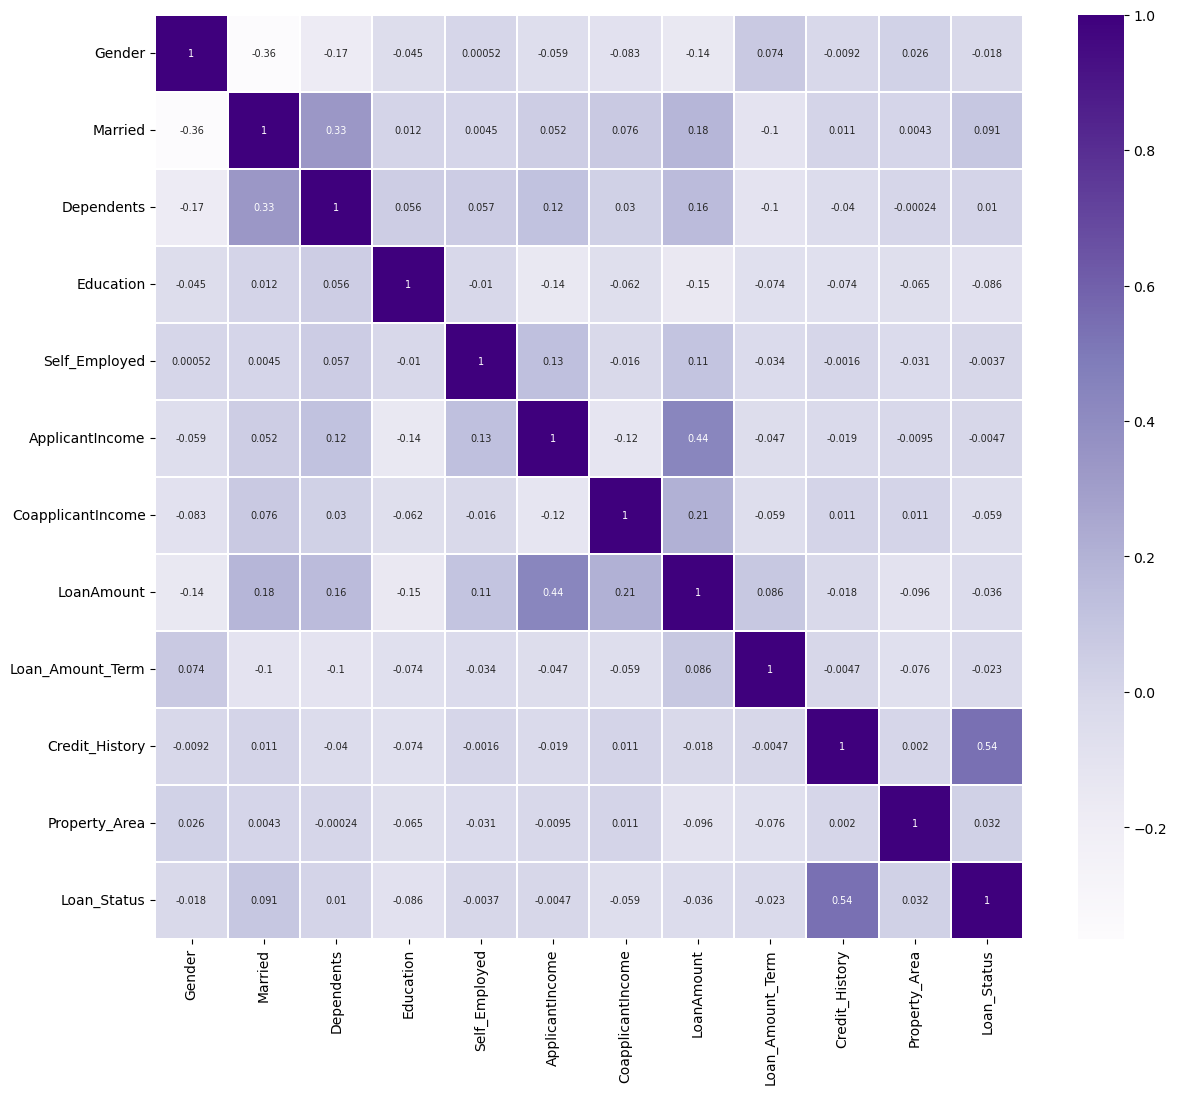

In [70]:
plt.figure(figsize=(14,12))
sns.heatmap(df3.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 50.5 KB


In [76]:
X = df3.drop(['Loan_Status'], axis=1)
y = df3['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
               'logisticregression__penalty' : ['l2'],
                'logisticregression__multi_class' : ['auto', 'ovr', 'multinomial'],
                'logisticregression__fit_intercept' : [True, False],
                 'logisticregression__n_jobs' : [1,2,3],
                'logisticregression__solver':['lbfgs'], 
                'logisticregression__max_iter':[400]
            }
        },
         'KNN': {
             'model': KNeighborsClassifier(),
             'params': {
                 'kneighborsclassifier__weights': ['uniform', 'distance'],
                 'kneighborsclassifier__algorithm': ['ball_tree', 'kd_tree']
             }
        },
        'SVC': {
             'model': SVC(),
             'params': {
                 'svc__shrinking' : [True, False],
                 # 'splitter': ['best','random'],
                 'svc__decision_function_shape' : ['ovo', 'ovr']
             }
        },
         'GaussianNB': {
             'model':GaussianNB(),
             'params': {
                
         }         
        },
         'Decision_tree_classifier': {
             'model':DecisionTreeClassifier(),
             'params': {
                 'decisiontreeclassifier__criterion':['gini','entropy'],
                 'decisiontreeclassifier__max_features':['sqrt','log2']
                
         }         
        },
         'RandomForestClassifier': {
             'model':RandomForestClassifier(),
             'params': {
                 'randomforestclassifier__n_estimators':[1000]
                 
                
         }         
        }
        
    }
     
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    # # define the pipeline
    # trans=scale
  
    for algo_name, config in algos.items():
        pipe = make_pipeline(StandardScaler(), config['model'])
        gs =  GridSearchCV(pipe, config['params'], cv=5, error_score='raise',return_train_score=False)
       # gs =  GridSearchCV(pipeline,config['params'], cv=cv, error_score='raise',return_train_score=False)

        # gs =  make_pipeline(StandardScaler(),
        # GridSearchCV(config['model'], config['params'], cv=cv, error_score='raise',return_train_score=False)
        #                    )
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
# trans = MinMaxScaler()
# trans=StandardScaler()
find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,logistic_regression,0.807837,"{'logisticregression__fit_intercept': True, 'l..."
1,KNN,0.785073,{'kneighborsclassifier__algorithm': 'ball_tree...
2,SVC,0.806211,"{'svc__decision_function_shape': 'ovo', 'svc__..."
3,GaussianNB,0.798107,{}
4,Decision_tree_classifier,0.714967,"{'decisiontreeclassifier__criterion': 'gini', ..."
5,RandomForestClassifier,0.789951,{'randomforestclassifier__n_estimators': 1000}
